# Task 3:Exploratory Data Analysis(Retail)-perform EDA on dataset and derive business problems


# GRIP @THE SPARK FOUNDATION


# Author: Godwin-Demilade Adegbehingbe.


# December 2021 Batch

In [1]:
#importing libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Reading of files
store = pd.read_csv('SampleSuperstore.csv')
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Steps of EDA
Descriptive Statistics
Missing values
Grouping Data
Outlier Detection
Correlations
After importing Pandas, NumPy and all the libraries required for visualization (Seaborn, Matplotlib, Missingno etc.) from the Python library, we can import data.

In [5]:
store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
#Handling missing values
store.columns[store.isnull().any()]

Index([], dtype='object')

In [7]:
#finding duplicate entries
store.duplicated().sum()

17

In [8]:
#dropping duplicates
store =store.drop_duplicates()
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


# Data Exploration & Visualization

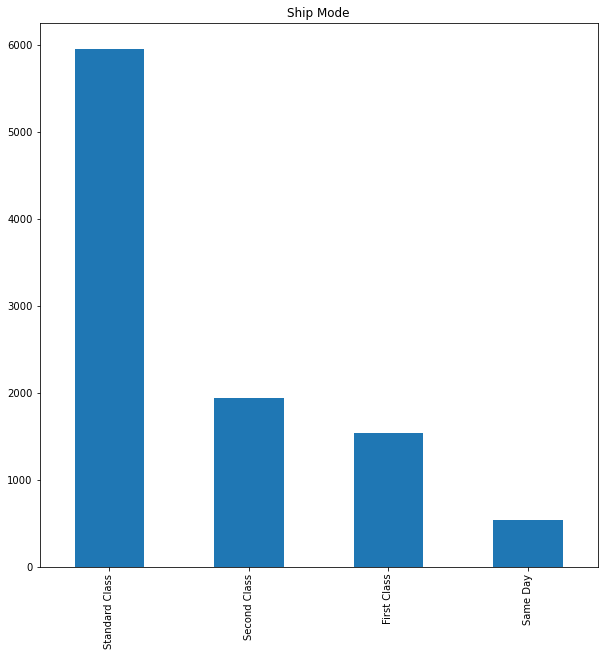

In [12]:
fig_size= (10,10)
plt.figure(figsize=(10,10))
store['Ship Mode'].value_counts().plot.bar(figsize = fig_size)
plt.title("Ship Mode")
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

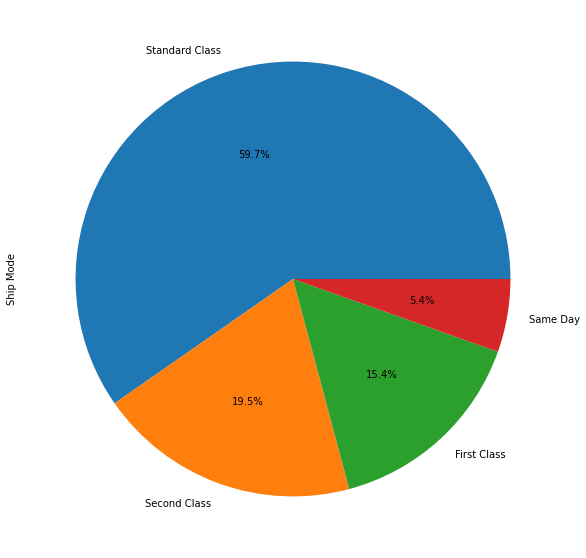

In [13]:
plt.figure(figsize=(10,10))
store['Ship Mode'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

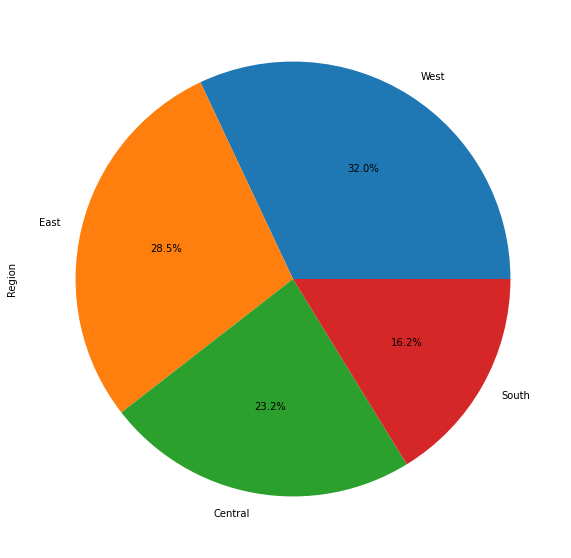

In [14]:
#percentage of the Region  of the datasets
plt.figure(figsize=(10,10))
store['Region'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show

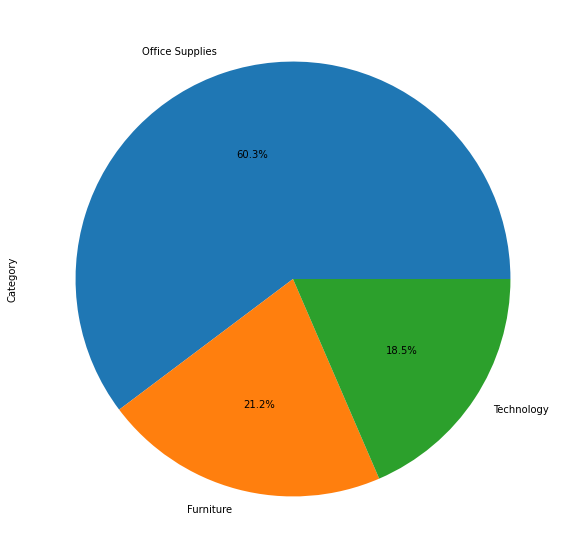

In [15]:
#percentage of Category of the datasets
plt.figure(figsize=(10,10))
store['Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

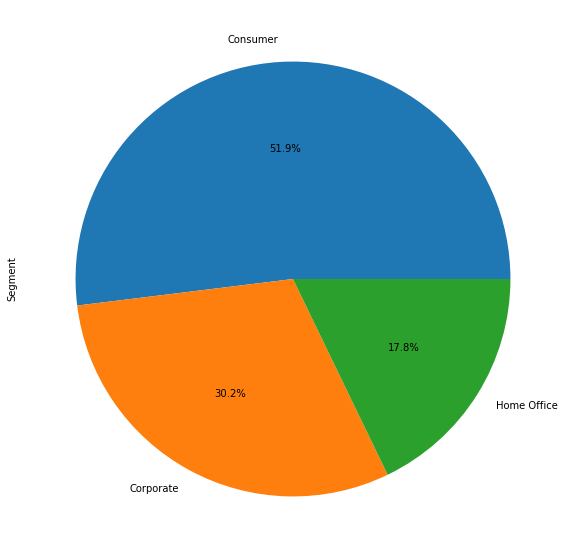

In [16]:
#percentage of Segment of the datasets
plt.figure(figsize=(10,10))
store['Segment'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()


Text(0.5, 1.0, 'Sub-Category')

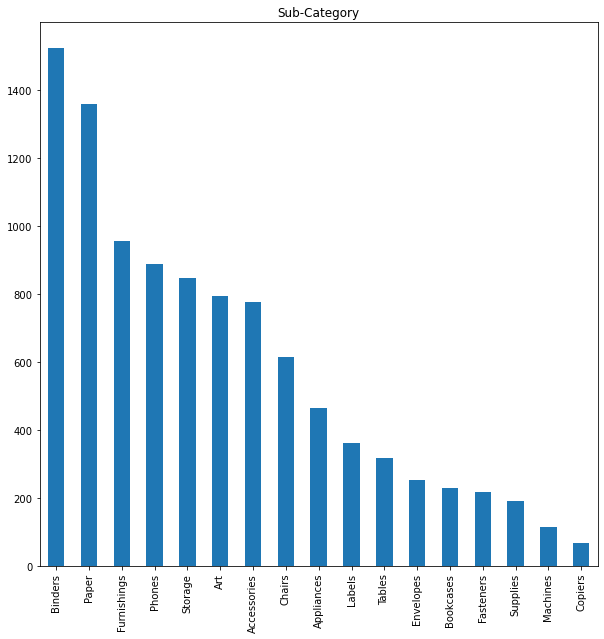

In [17]:
store['Sub-Category'].value_counts().plot.bar(figsize = fig_size)
plt.title("Sub-Category")

Text(0.5, 1.0, 'City')

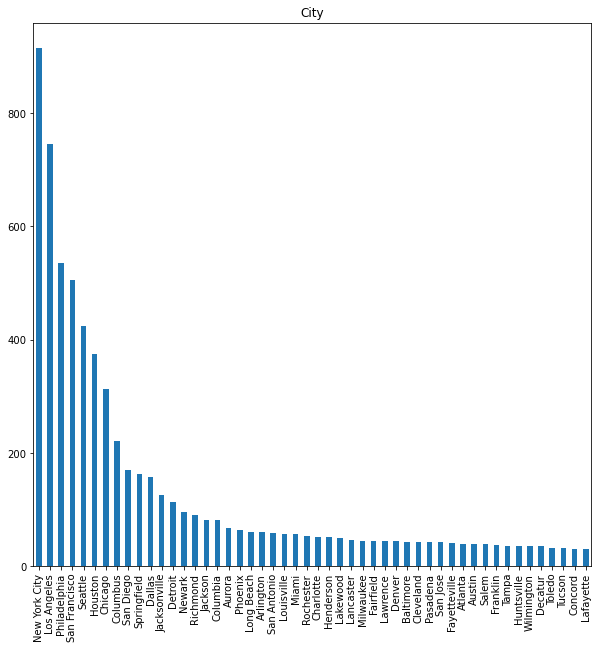

In [18]:
plt.figure(figsize=(10,10))
store['City'].value_counts().head(50).plot.bar(figsize = fig_size)
plt.title("City")

Text(0.5, 1.0, 'State')

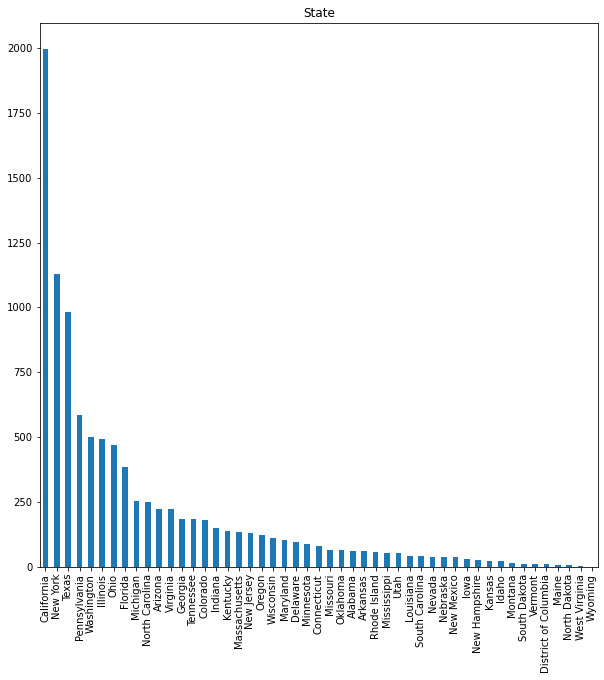

In [19]:
#total no of orders from different states  
store['State'].value_counts().plot.bar(figsize = fig_size)
plt.title("State")

In [20]:
#grouping of State with their top cities
int =store['City'].groupby(store["State"])
int.groups
int.describe()

,count,unique,top,freq
State,,,,
Alabama,61,8,Decatur,13
Arizona,224,13,Phoenix,63
Arkansas,60,9,Little Rock,24
California,1996,81,Los Angeles,746
Colorado,182,16,Denver,44
Connecticut,82,10,Fairfield,19
Delaware,96,3,Newark,60
District of Columbia,10,1,Washington,10
Florida,383,36,Jacksonville,75


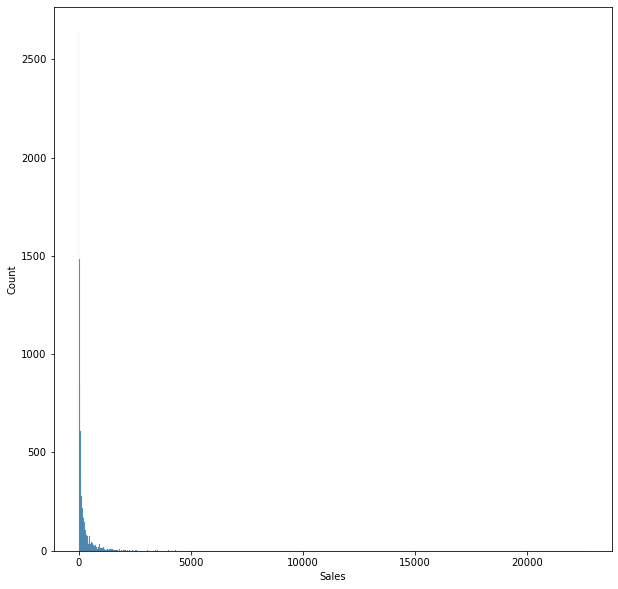

In [21]:
plt.figure(figsize=(10,10))
sns.histplot(store,x='Sales')
plt.show()

# Exploratory data analysis

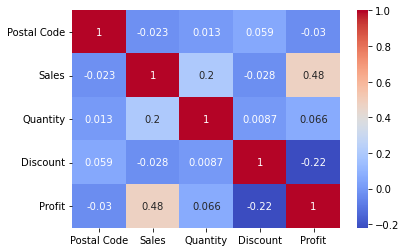

In [22]:
#finding correlations between columns
corrMatrix =store.corr()
sns.heatmap(corrMatrix, annot = True, cmap= 'coolwarm')

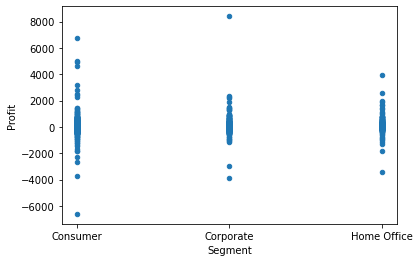

In [23]:
#relationship of the segements and profit
store.plot(x="Segment", y="Profit", kind="scatter")

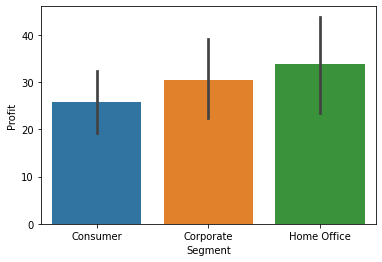

In [24]:
#relationship between segment and profit
sns.barplot(x='Segment',y="Profit",data=store)
plt.show()

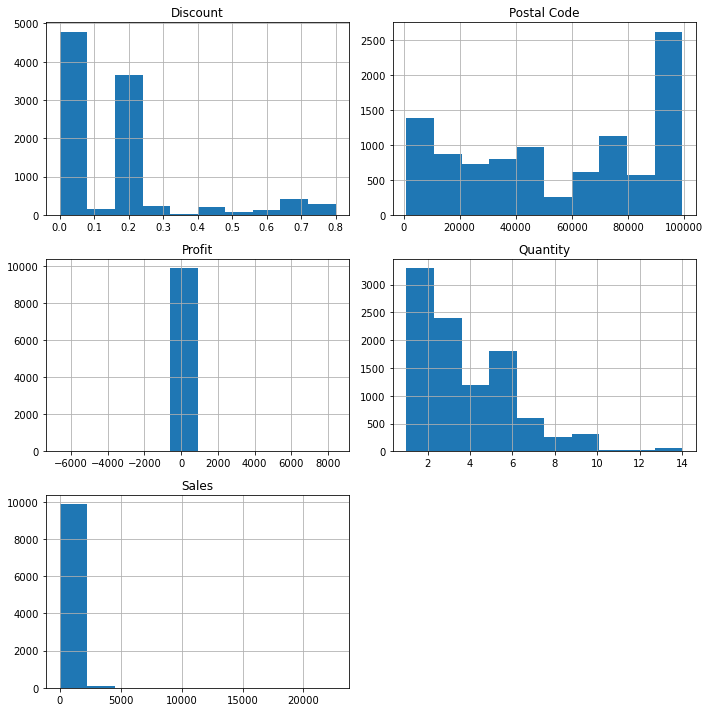

In [25]:
store.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

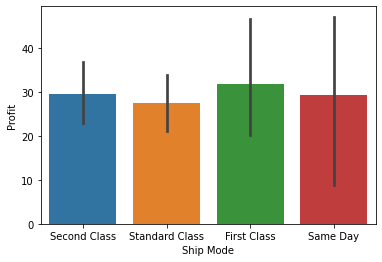

In [26]:
#the relationship between ship mode and profit

sns.barplot(x="Ship Mode",y="Profit",data=store)

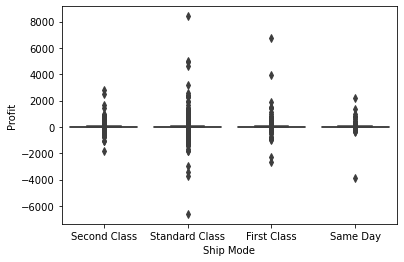

In [27]:
sns.boxplot(x="Ship Mode",y="Profit",data=store)

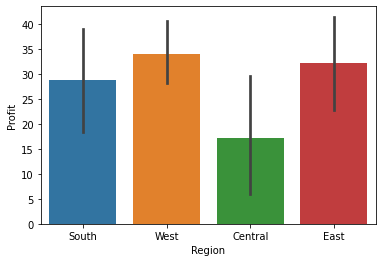

In [28]:
 #relationship between region and profit
    
sns.barplot(x="Region",y="Profit",data=store)

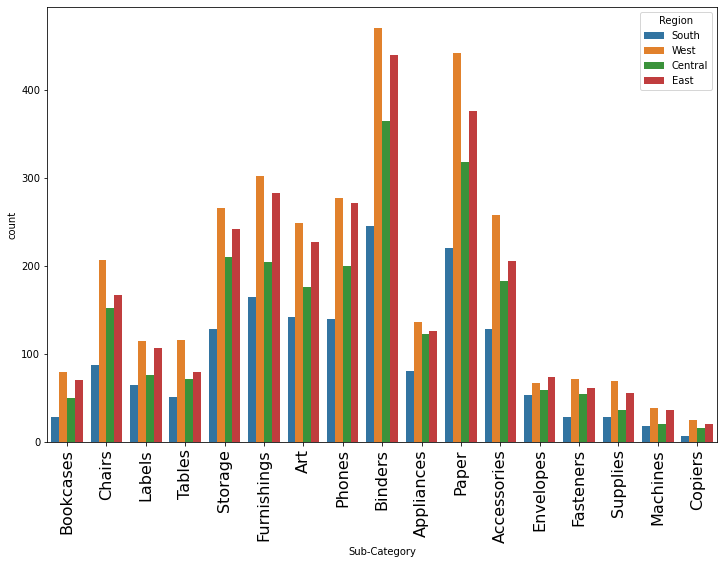

In [29]:
#region of different sub-categories order count
plt.figure(figsize=(12,8))
sns.countplot(x="Sub-Category",hue="Region",data=store)
plt.xticks(rotation="vertical",size=16)
plt.show()

# Sales

In [30]:
#Total sales category wise
sales= pd.DataFrame(store.groupby('Category').sum()['Sales'])
sales

,Sales
Category,
Furniture,741306.3133
Office Supplies,718735.2440
Technology,836154.0330


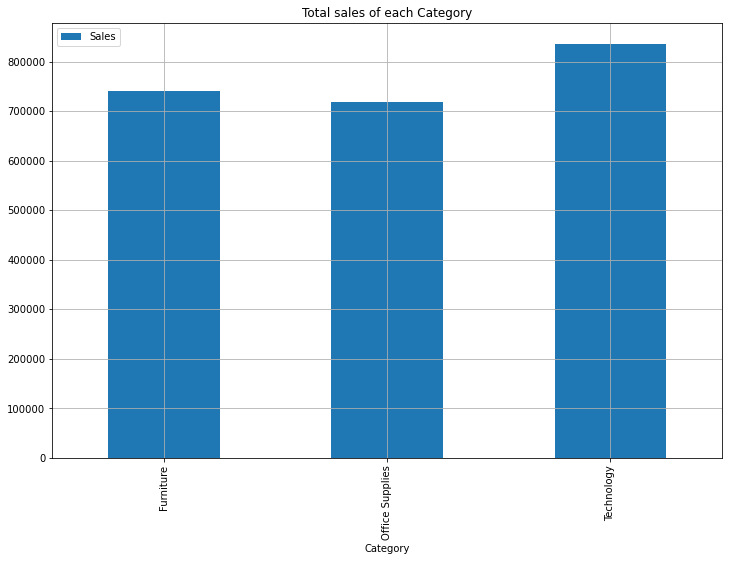

In [31]:
sales.plot.bar(figsize=(12,8),grid=True)
plt.title("Total sales of each Category")
plt.show()

In [32]:
#Total sales sub-category wise
sales= pd.DataFrame(store.groupby('Sub-Category').sum()['Sales'])
sales

,Sales
Sub-Category,
Accessories,167380.3180
Appliances,107532.1610
Art,27107.0320
Binders,203409.1690
Bookcases,114879.9963
Chairs,327777.7610
Copiers,149528.0300
Envelopes,16476.4020
Fasteners,3024.2800


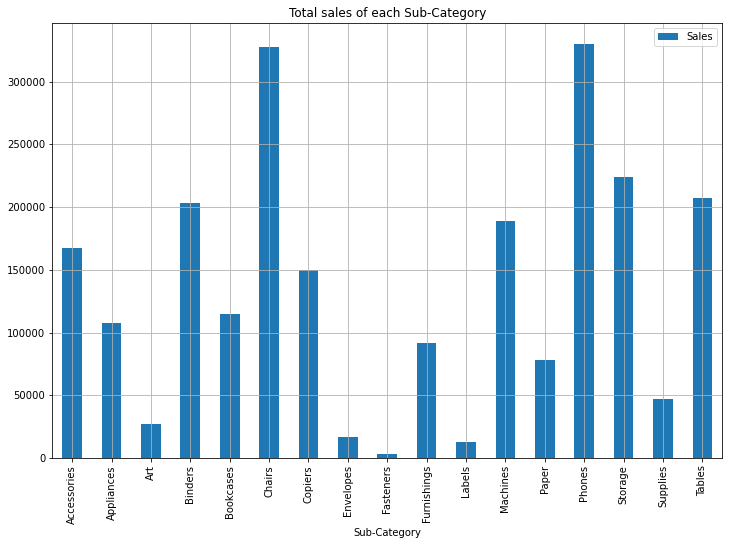

In [33]:
sales.plot.bar(figsize=(12,8),grid=True)
plt.title("Total sales of each Sub-Category")
plt.show()

In [34]:
#Total sales per region 
sales= pd.DataFrame(store.groupby('Region').sum()['Sales'])
sales

,Sales
Region,
Central,500782.8528
East,678435.1960
South,391721.9050
West,725255.6365


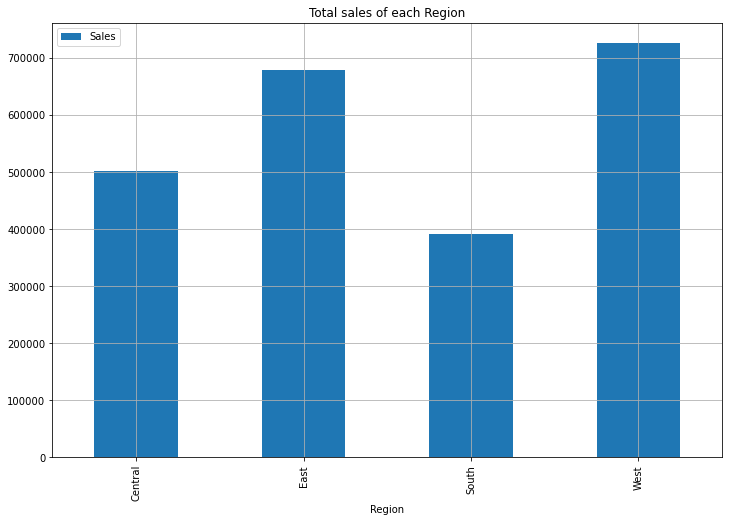

In [35]:
sales.plot.bar(figsize=(12,8),grid=True)
plt.title("Total sales of each Region")
plt.show()

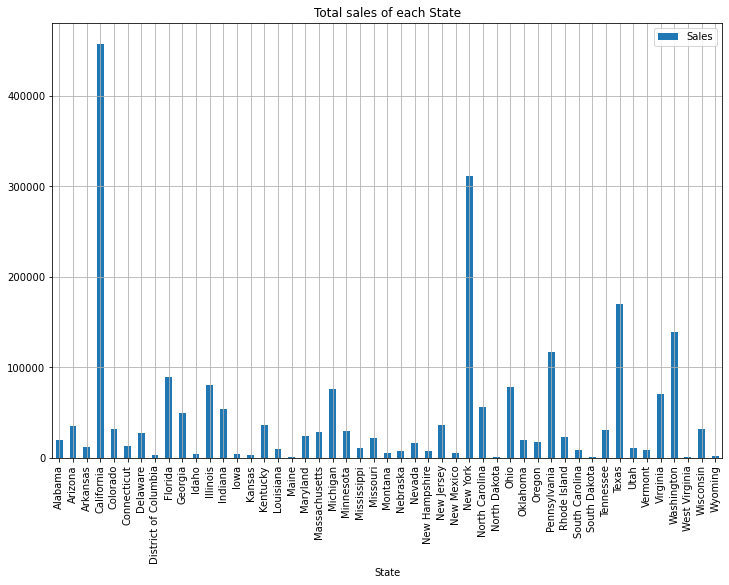

In [36]:
#Total sales per states
sales= pd.DataFrame(store.groupby('State').sum()['Sales'])
sales.plot.bar(figsize=(12,8),grid=True)
plt.title("Total sales of each State")
plt.show()

# Profits

In [37]:
#total profit category wise
profit = pd.DataFrame(store.groupby("Category").sum()["Profit"])
print(profit)

                      Profit
Category                    
Furniture         18421.8137
Office Supplies  122364.6608
Technology       145454.9481


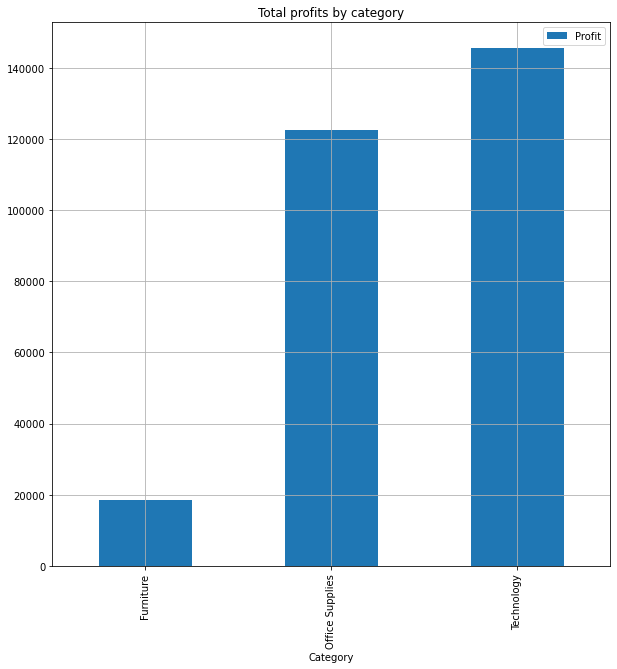

In [38]:
profit.plot.bar(figsize=(10,10),grid=True)
plt.title("Total profits by category")
plt.show()

In [39]:
#total profit sub category wise
profit = pd.DataFrame(store.groupby("Sub-Category").sum()["Profit"])
print(profit)

                  Profit
Sub-Category            
Accessories   41936.6357
Appliances    18138.0054
Art            6524.6118
Binders       30228.0003
Bookcases     -3472.5560
Chairs        26567.1278
Copiers       55617.8249
Envelopes      6964.1767
Fasteners       949.5182
Furnishings   13052.7230
Labels         5526.3820
Machines       3384.7569
Paper         33944.2395
Phones        44515.7306
Storage       21278.8264
Supplies      -1189.0995
Tables       -17725.4811


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

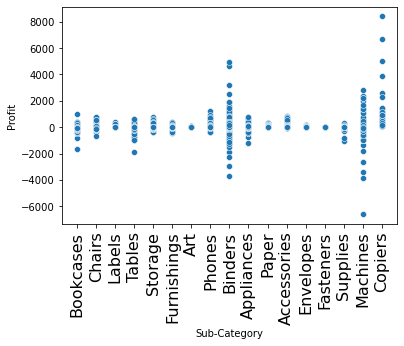

In [40]:
#distribution of profits by sub category
sns.scatterplot(x="Sub-Category",y="Profit",data=store)
plt.xticks(rotation="vertical",size=16)

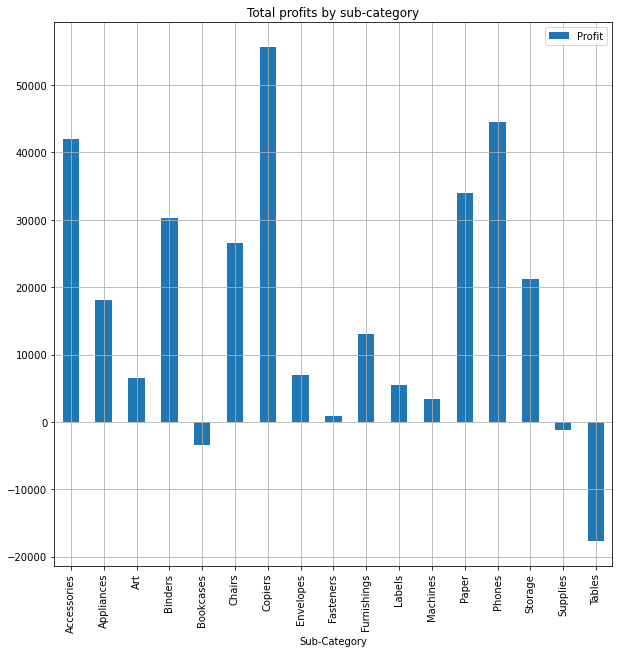

In [41]:
profit.plot.bar(figsize=(10,10),grid=True)
plt.title("Total profits by sub-category")
plt.show()

In [42]:
#top 10 sub-categories with less profit
profit =profit.sort_values("Profit",ascending=True)
print(profit.head(10))

                  Profit
Sub-Category            
Tables       -17725.4811
Bookcases     -3472.5560
Supplies      -1189.0995
Fasteners       949.5182
Machines       3384.7569
Labels         5526.3820
Art            6524.6118
Envelopes      6964.1767
Furnishings   13052.7230
Appliances    18138.0054


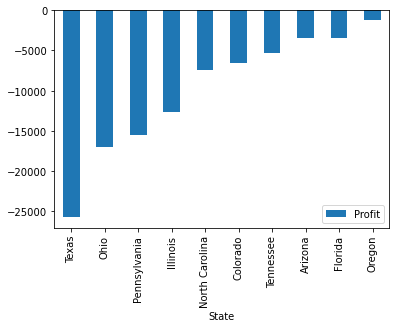

In [43]:
#Unprofitable states
state_profit=pd.DataFrame(store.groupby('State').sum()['Profit'])
state_profit.sort_values("Profit",ascending=True)[:10].plot.bar()

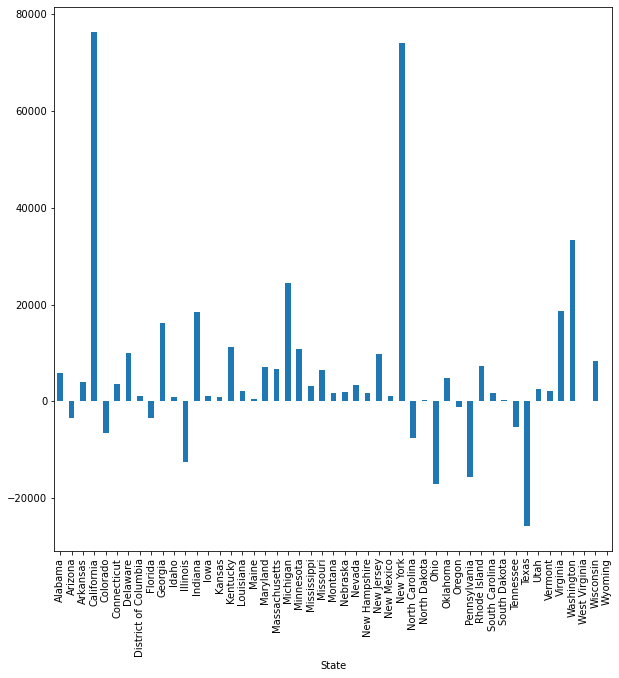

In [44]:
#profit per State wise
plt.figure(figsize=(10,10))
store.groupby("State").sum()["Profit"].plot.bar(figsize=(10,10))
plt.show()

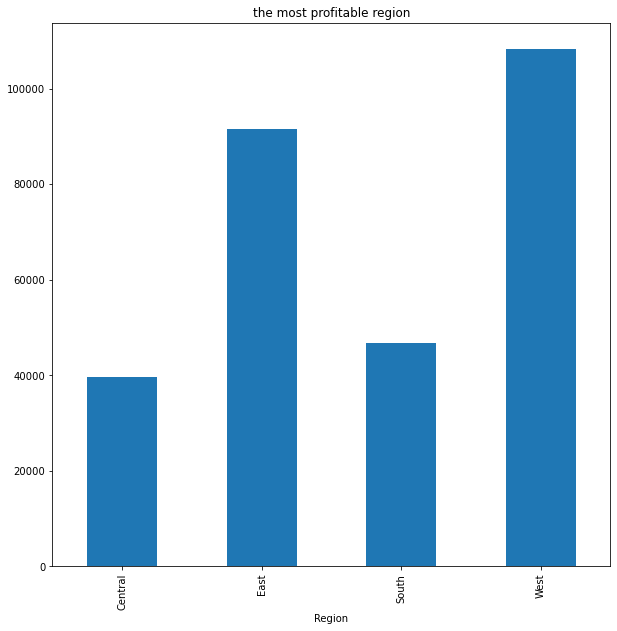

In [45]:

#profit per region wise
plt.figure(figsize=(10,10))
store.groupby("Region").sum()["Profit"].plot.bar(figsize=(10,10))
plt.title("the most profitable region")
plt.show()

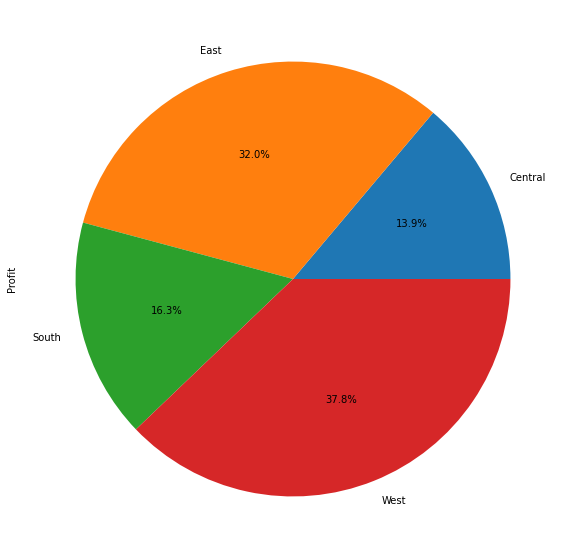

In [46]:
#profit per region wise
plt.figure(figsize=(10,10))
store.groupby("Region").sum()["Profit"].plot.pie(autopct="%1.1f%%")
plt.show()

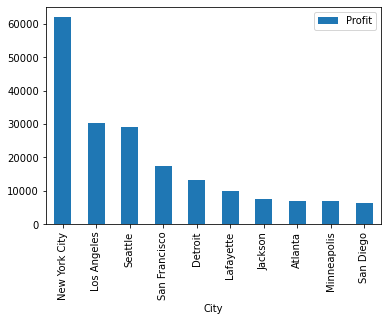

In [47]:
#profitable cities
city_profit=pd.DataFrame(store.groupby('City').sum()['Profit'])
city_profit.sort_values("Profit",ascending=False)[:10].plot.bar()

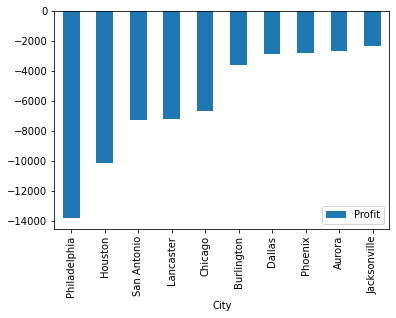

In [48]:
#less profitable cities
city_profit=pd.DataFrame(store.groupby('City').sum()['Profit'])
city_profit.sort_values("Profit",ascending=True)[:10].plot.bar()

# Sales Vs Profits

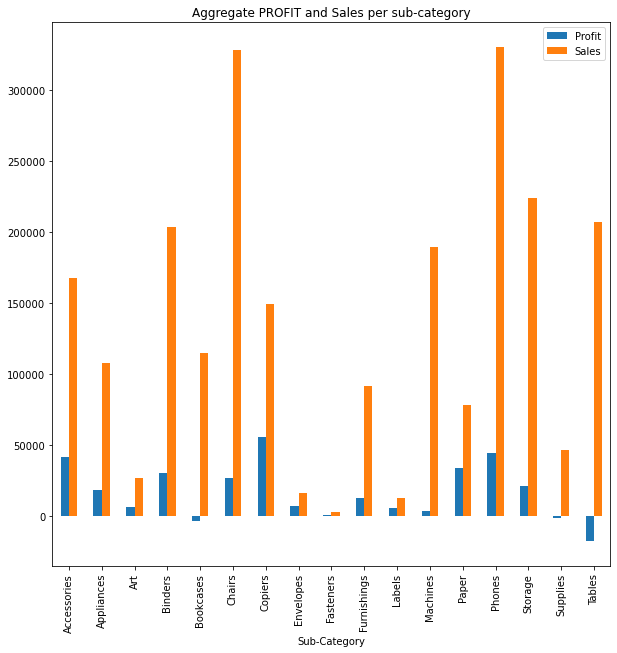

In [49]:
#comparison between sales and profit
store.groupby("Sub-Category")[['Profit','Sales']].sum().plot.bar(figsize=(10,10))
plt.title("Aggregate PROFIT and Sales per sub-category")
plt.show()

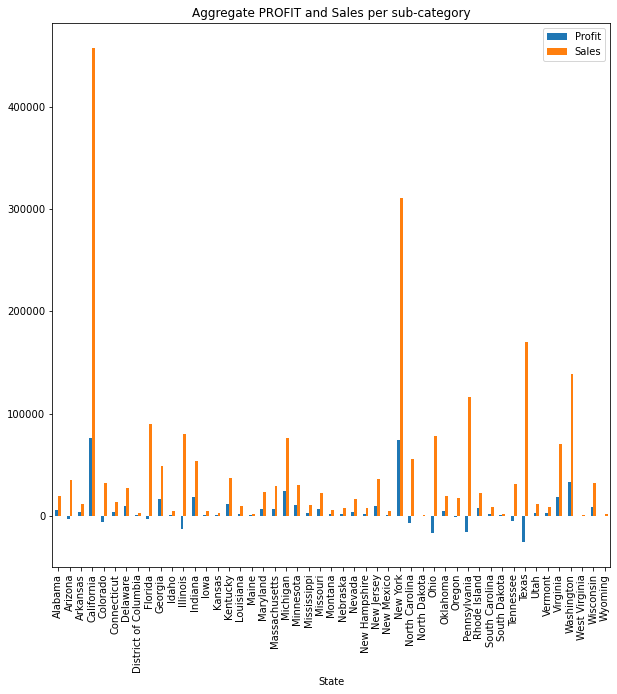

In [50]:
#comparison between sales and profit
store.groupby("State")[['Profit','Sales']].sum().plot.bar(figsize=(10,10))
plt.title("Aggregate PROFIT and Sales per sub-category")
plt.show()

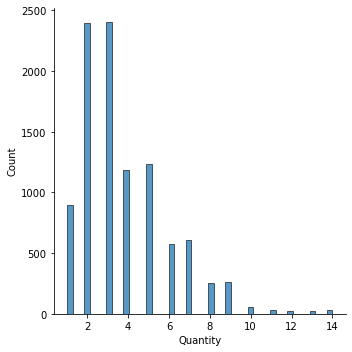

In [51]:
sns.displot(store['Quantity'])

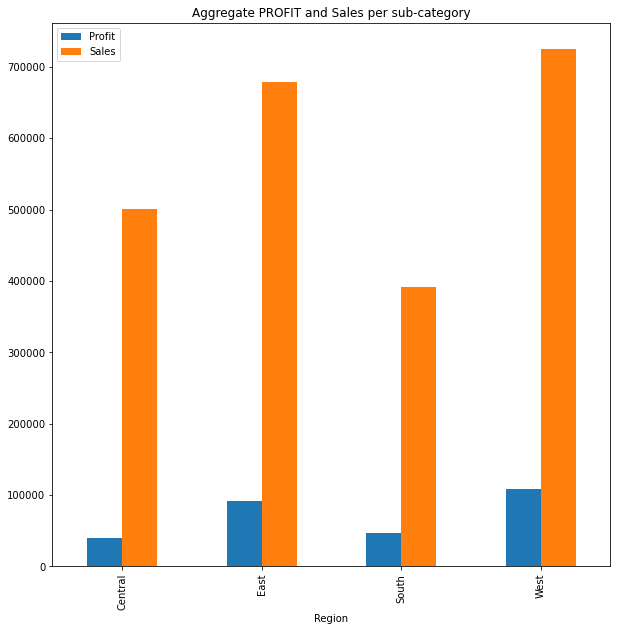

In [52]:
#comparison between sales and profit
store.groupby("Region")[['Profit','Sales']].sum().plot.bar(figsize=(10,10))
plt.title("Aggregate PROFIT and Sales per sub-category")
plt.show()

# Conclusion&Advice

1.Home office is the most profitable segment ,although it has the lowest orders .for more profits,increase sales of home office segment and reduce sales of consumer segment by removing discounts from it.
2.increase the sales of copiers amd phones while limiting that of tables and bookcases
3.increase sales in new york and california for more profit, they are the most profitable state
4.increase sales both in the east and west for more profit
5.reduce the sales of furniture and increase sales of technology and office supplies(furnitures has high sales but the lowest profit)